In [1]:
import PIL
from PIL import Image,ImageFilter  # import the pil 

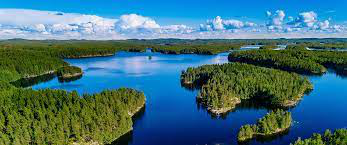

In [2]:
# Open image
image_original = Image.open(r"download.jpg")
display(image_original)

In [3]:
img = image_original.convert('RGB')

width, height = img.size

pixels = img.load()

In [4]:
def setIntensity(img, per, color):
    newImage = PIL.Image.new(img.mode, (img.width,img.height))
    
    for px in range(img.width):
        for py in range(img.height):
            r,g,b = img.getpixel((px,py))
            if color == 0:
                newImage.putpixel((px,py),(int(r*(per/10)),g,b))
            if color == 1:
                newImage.putpixel((px,py),(r,int(g*(per/10)),b))
            if color == 2:
                newImage.putpixel((px,py),(r,g,int(b*(per/10))))
                
    return newImage

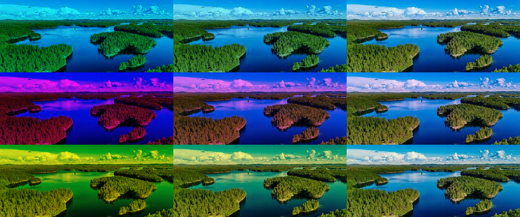

In [5]:
images=[]
per =[1,5,9]
color = [0,1,2]

for color in color:
    for i in per:
        images.append(setIntensity(img,i,color))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(img.mode, (img.width*3,img.height*3))
x=0
y=0

for img in images:
    
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

In [6]:
for i in [1,5,9]:
    print(i)

1
5
9
